Import des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ce script analyse et visualise les données de centralité par cluster tirée de l'analyse réseau.
'Centralité des individus par cluster'

In [2]:
df = pd.read_csv('./fullpop/monoparti/data/nodes.csv')

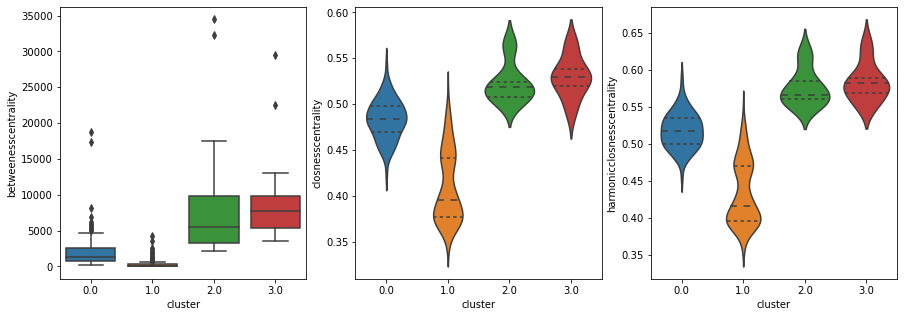

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
ax_betw = sns.boxplot(ax = axes[0], x="cluster", y="betweenesscentrality", data=df)
ax_clos = sns.violinplot(ax = axes[1], x="cluster", y="closnesscentrality", data=df, inner="quartile")
ax_harm = sns.violinplot(ax = axes[2], x="cluster", y="harmonicclosnesscentrality", data=df, inner="quartile")
plt.savefig('./exports/centralites_fullpop_monoparti')

Analyse de l'échevinage de 1444

enrichissement des données avec les corporations et les poêles

In [2]:
df = pd.read_csv('./preprocessing/clustered_nodes.csv')

In [3]:
df_ref = pd.read_csv('../03-data_analysis/occ_ech_1444.csv')
df_ref = df_ref.loc[df_ref['role'] == 'group_50']
df_ref = df_ref.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
df_ref = df_ref.replace(['group_39', 'group_43', 'group_41', 'group_42', 'group_44', 'group_46', 
                         'group_40', 'group_71', 'group_72', 'group_69', 'group_66', 'group_64',
                         'group_63', 'group_68', 'group_74', 'group_70', 'group_33', 'group_35',
                         'group_45', 'group_47', 'group_38', 'group_34', 'group_36', 'group_37',
                         'group_65', 'group_67', 'group_73', 'group_55'],
               ['zum Anker', 'zum Schiff', 'zum Hirtzhorn', 'zum Holtzapfel', 'zum Spiegel', 'zur Blume',
                'zum Friburger', 'orfèvres', 'peintres de boucliers', 'mesureurs de vin', 'crieurs de vin', 'barbiers',
                'baigneurs', 'huiliers', 'tondeurs de draps', 'meuniers', 'am Oberstaden', 'hinter Sankt-Kathrinen',
                'zum Teich', 'zur Waseneck', 'unter Wagner', 'an der Steinstraße', 'in der Krutenau', 'in der Ruprechtsau',
                'cordiers', 'fruitiers', 'regrattiers', 'carreleurs'])

In [4]:
df_ref['cluster'] = np.nan
df = df.set_index('Id')
df_ref = df_ref.set_index('authority')

In [5]:
df_ref['cluster'].update(df['cluster'])
df_ref.reset_index(inplace=True)

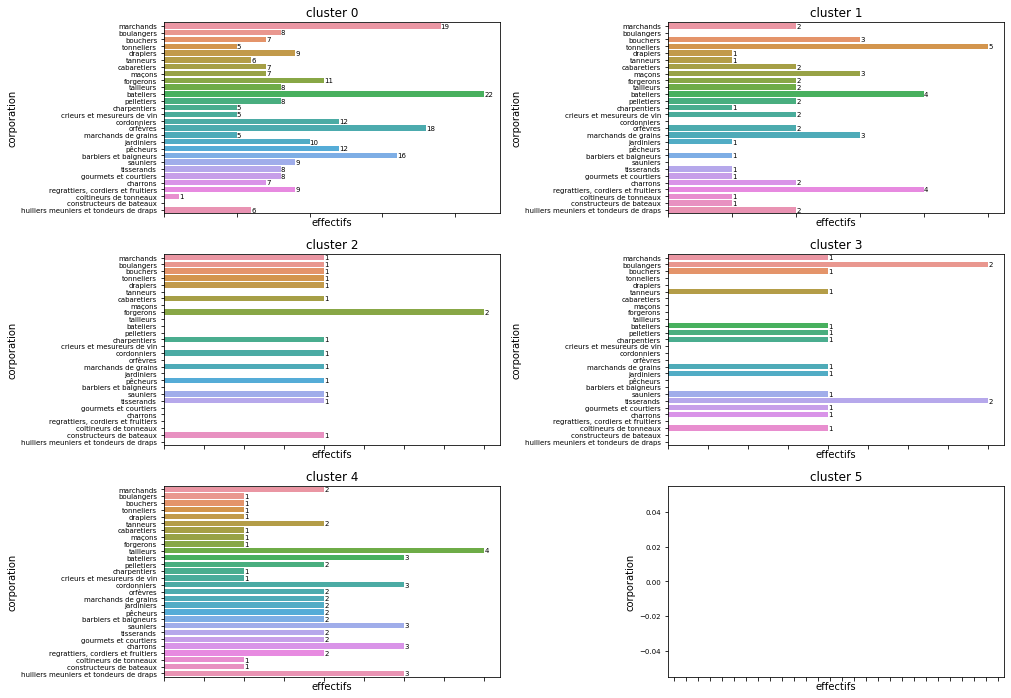

In [6]:
nrow = 3
ncol = 2
n = 0
fig, axs = plt.subplots(nrow, ncol, figsize=( 15, 10), sharey = False, sharex = False)
for i, ax in enumerate(fig.axes):
    sub_df = df_ref.loc[df_ref['cluster'] == n]
    df_ana= sub_df["represents_in"].value_counts().rename_axis('unique_values').to_frame('counts').reset_index(level=0)
    ax.title.set_text('cluster ' + str(n))
    barplot = sns.barplot(ax = ax, x="counts", y = "unique_values",  data=df_ana, order = ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
    ax.set_ylabel('corporation')
    ax.set_xlabel('effectifs')
    barplot.tick_params(labelsize=5)
    ax.tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
    ax.bar_label(ax.containers[0], fontsize=7)
    n = n+1
    plt.tight_layout()
    ax.tick_params(axis='x',label1On=False)
plt.savefig('./effectifs_corporation_cluster.svg', dpi=300)